#4.7.2 키와 몸무게에 따른 체형 군집화(Clustering)

##라이브러리 임포트

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # k-means 알고리즘 사용

##데이터 만들기

In [2]:
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]
df # 데이터 출력

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


##데이터 시각화

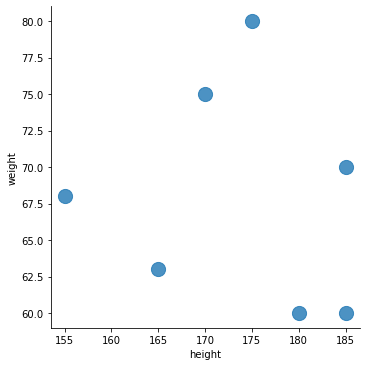

In [3]:
sns.lmplot(x='height', y='weight', data=df, fit_reg=False, # x축, y축, 데이터, 노라인
           scatter_kws={"s": 200})  #좌표점 크기

##k 평균 군집화

In [4]:
# 사이킷런의 kmeans 모듈(라이브러리) 사용하여 Clustering실행
print(df.values)
kmeans = KMeans(n_clusters=3).fit(df.values)
# KMeans 실행 시 클러스터의 최초 중심(centrold)설정은 default는 kmeans++을 사용함.
# 만약 임의의 위치로 지정하려면 KMeans의 괄호 안에 init = 'random'을 추가하면 됨.

[[185 60]
 [180 60]
 [185 70]
 [165 63]
 [155 68]
 [170 75]
 [175 80]]


In [5]:
#KMeans 실행 결과, 3개의 centroid 위치 확인
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [172.5       ,  77.5       ],
       [160.        ,  65.5       ]])

In [6]:
#데이터가 어느 군집에 소속되어 있는지를 데이터 프레임(표)의 cluster_id 열에 저장
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,2
4,155,68,2
5,170,75,1
6,175,80,1


##k 평균 군집 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


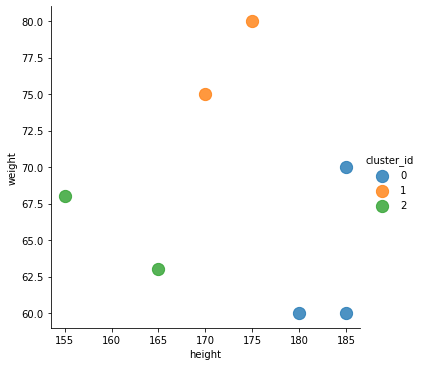

In [7]:
sns.lmplot('height', 'weight', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           hue="cluster_id") # hue : 표시할 데이터(범례)